# Assignment 1
## Exercise 1: k-NN Classification
First, I import the packages I'm going to use during the exercise: 
- [pandas](https://pandas.pydata.org)
- [numpy](www.numpy.org)
- [matplotlib](http://matplotlib.org) 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

I use Pandas to load the microchips file and extract the data and the labels in two different arrays:

In [7]:
data = pd.read_csv("src/microchips.csv")

X_train = data.iloc[:, :2].to_numpy()
y_train = data.iloc[:, 2].to_numpy()

I plot the original microchip data (I used pandas to help me group the data by label so that I can plot the legend):

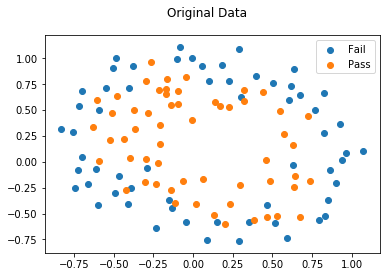

In [3]:
fig, ax = plt.subplots()

groups = data.groupby(y_train) 

for _,group in groups:
    ax.scatter(group.iloc[:, 0], group.iloc[:, 1])
ax.legend(['Fail', 'Pass'])
fig.suptitle('Original Data', fontsize=12)

plt.show()

Here I have implemented and used my own k-NN classifier to predict whether the three unknown microchips are likely to be OK for k = 1,3,5,7

In [5]:
def calculate_distance(X_train, x_test):
    return np.sum((X_train - x_test) ** 2, axis=1)

def knn(X_train, x_test, y_train, k): 
    
    #compute distances
    distances = calculate_distance(X_train, x_test)

    #get k nearest neighbours labels
    k_idx = np.argsort(distances)[:k]
    closest_neighbours = y_train[k_idx]
    
    #most common label
    labels, votes = np.unique(closest_neighbours, return_counts=True)
    most_voted_label = np.argmax(votes)
    
    return labels[most_voted_label] #return the value most likely to be

def predict(X, k):
    predicted_lables = [knn(X_train, x, y_train, k) for x in X]
    return predicted_lables

# the three unknown microchips
chips = np.array([[-.3,1.0],[-.5,-.1],[.6,0.0]])

for k in range(1, 8, 2):
    
    #calculate the predicted labels for the three microchips
    predictions = predict(chips, k)
    
    print (f"k = {k}\n")
    for i, prediction in enumerate(predictions):
        if prediction == 1:
            print(f"    chip{i+1}: {chips[i]} ==> OK" )
        else:
            print(f"    chip{i+1}: {chips[i]} ==> Fail" )    
    print()

k = 1

    chip1: [-0.3  1. ] ==> OK
    chip2: [-0.5 -0.1] ==> Fail
    chip3: [0.6 0. ] ==> Fail

k = 3

    chip1: [-0.3  1. ] ==> Fail
    chip2: [-0.5 -0.1] ==> Fail
    chip3: [0.6 0. ] ==> OK

k = 5

    chip1: [-0.3  1. ] ==> Fail
    chip2: [-0.5 -0.1] ==> OK
    chip3: [0.6 0. ] ==> OK

k = 7

    chip1: [-0.3  1. ] ==> Fail
    chip2: [-0.5 -0.1] ==> Fail
    chip3: [0.6 0. ] ==> OK



Lastly I plot the decision boundary and the training errors for k = 1,3,5,7:

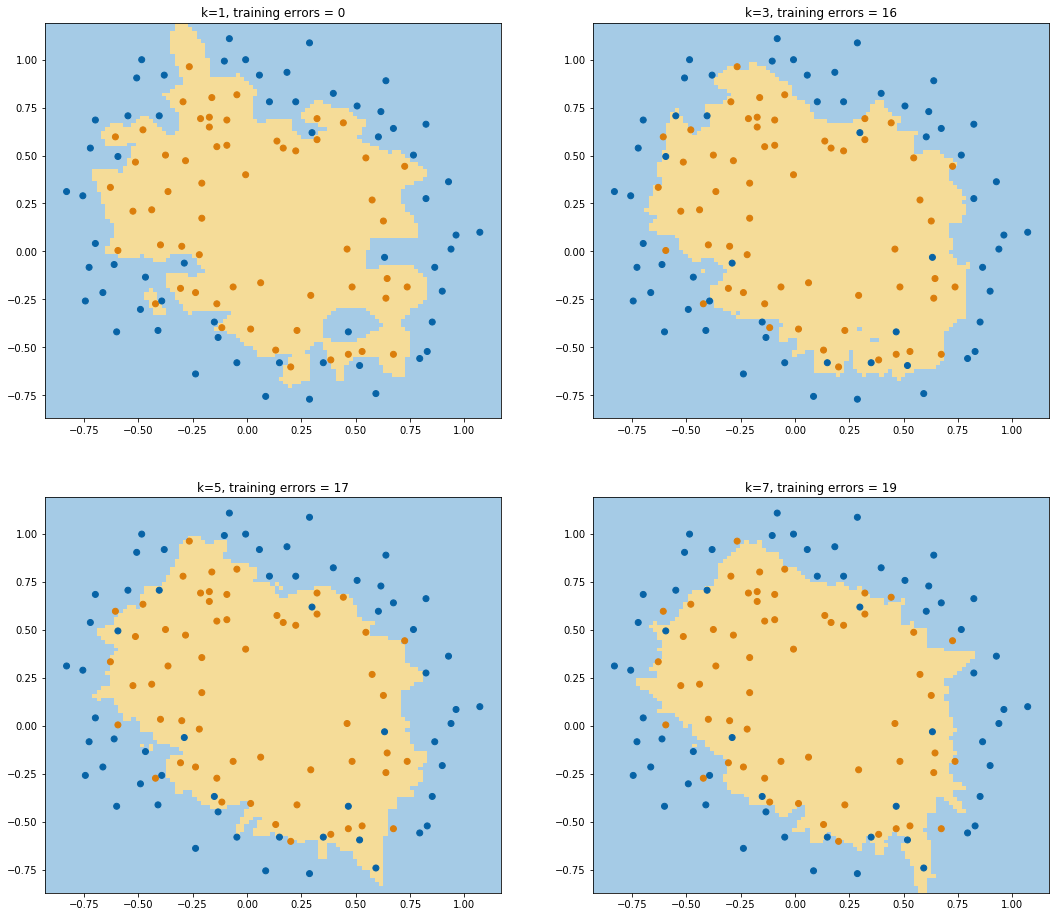

In [18]:
# Decision boundary
x_min, x_max = X_train[:, 0].min()-0.1, X_train[:, 0].max()+0.1
y_min, y_max = X_train[:, 1].min()-0.1, X_train[:, 1].max()+0.1

# mesh grid
h = 0.02 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh = np.c_[xx.ravel(), yy.ravel()] # Turn to Nx2 matrix

cmap_mesh = ListedColormap(['#a5cbe6', '#f5dc98'])
cmap_scatter = ListedColormap(['#0763a6', '#db7e0b'])

fig1, ax1 = plt.subplots(2, 2, figsize=(18, 16))

for idx, k in zip(([0, 0], [0, 1], [1, 0], [1, 1]),
                        [1, 3, 5, 7]):
    # calculate training errors
    training_error = np.sum(np.equal(predict(X_train, k), y_train) == False)
    
    # classify points in the xy-mesh
    Z = predict(xy_mesh, k)
    clz_mesh = np.array(Z).reshape(xx.shape)
    
    ax1[idx[0], idx[1]].pcolormesh(xx, yy, clz_mesh, cmap=cmap_mesh)
    ax1[idx[0], idx[1]].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_scatter)
    ax1[idx[0], idx[1]].set_title(f"k={k}, training errors = {training_error}")       

plt.show()